# Mount Notebook to Google Drive
Dataset: https://ars.els-cdn.com/content/image/1-s2.0-S2352340917303487-mmc2.csv

Data Name: '1-s2.0-S2352340917303487-mmc2.csv'

Naming Convention: '/content/drive/MyDrive/CSE6250/1-s2.0-S2352340917303487-mmc2.csv'

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Introduction
## Background of the problem:

**Problem type:** Multi-label classification of Psychotic Disorder Diseases (PDD) using patient medical records.  
**Importance:** Accurate classification of PDD is crucial for early diagnosis, tailored treatment plans, and improved patient outcomes. It can assist clinicians in making informed decisions.  
**Difficulty:** PDD classification is challenging due to overlapping symptoms, heterogeneous patient populations, and the presence of multiple comorbid conditions. Moreover, medical records often contain class imbalances and missing data.  
**State of the art:** Traditional methods rely on clinical expertise and diagnostic criteria like DSM-5. Machine learning approaches such as support vector machines and decision trees have been applied, but their performance is limited by the complexity of PDD.

## Paper explanation:

**Proposal:** The paper "Application of deep and machine learning techniques for multi-label classification performance on psychotic disorder diseases" by Israel Elujide et al. proposes using deep learning (multilayer perceptron) and machine learning techniques (random forest, SVM, decision tree) for multi-label PDD classification. They also employ SMOTE oversampling to handle class imbalance.  
**Innovations:**
- Application of deep learning to PDD classification, which can capture complex non-linear relationships in the data.
- Use of SMOTE oversampling to address class imbalance, which is a common issue in medical datasets.
- Analysis of feature importances and correlations to gain insights into PDD risk factors.

**Effectiveness:** The proposed deep learning model achieved an accuracy of 75.17% on an imbalanced test set, outperforming machine learning techniques. The random forest model obtained 64.1% accuracy on a balanced dataset after SMOTE oversampling.  
**Contributions:**
- Demonstrates the potential of deep learning for improving PDD classification, which could aid in clinical decision support.
- Highlights the importance of addressing class imbalance in medical data using techniques like SMOTE.
- Identifies key features (e.g., age) and correlations (e.g., bipolar disorder and insomnia) that contribute to PDD risk, which could inform future research and interventions.


# Scope of Reproducibility

## Hypotheses to Test:

1. **Hypothesis:** Deep learning with multilayer perceptron (MLP) will perform better than machine learning techniques like SVM, RF, and DT for multi-label psychotic disorder classification on an imbalanced dataset.
   - **Experiment:** Train and evaluate MLP, SVM, RF, and DT models on the imbalanced PDD dataset. Compare their classification accuracies.

2. **Hypothesis:** Machine learning with RF will outperform deep learning on a balanced dataset after using SMOTE oversampling to handle class imbalance.
   - **Experiment:** Apply SMOTE oversampling to the training data to balance the class distribution. Train and evaluate MLP and RF models on the balanced dataset. Compare their classification accuracies.

3. **Hypothesis:** Patient age will be the most important feature contributing to model performance.
   - **Experiment:** Train a random forest model on the PDD dataset and extract feature importances. Examine if age is ranked as the most important feature.

4. **Hypothesis:** There will be a strong correlation between bipolar disorder and insomnia diagnoses.
   - **Experiment:** Calculate the pairwise correlation between bipolar disorder and insomnia labels in the dataset. Check if the correlation coefficient indicates a strong positive relationship.

## Expected Results to Validate:

- The deep learning model will achieve an accuracy of ~75% on the imbalanced test set.
- The RF model will achieve ~64% on the balanced set.

## Experimental Setup:

- Train the MLP model on the imbalanced dataset.
- Train the RF model on the balanced dataset (after SMOTE oversampling).

## Evaluation Metrics:

- Evaluate the accuracies of the MLP and RF models on their respective test sets.
- Compare the achieved accuracies with the reported values in the paper.



# Methodology


In [1]:
# import  packages you need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras
import shap

import warnings
warnings.simplefilter("ignore")

# Data Description and Processing

## Data Source:

- **Source:** The dataset used in this study is obtained from the paper "Application of deep and machine learning techniques for multi-label classification performance on psychotic disorder diseases" by Israel Elujide et al.
- **Dataset:** Provided as a supplementary file with the paper (1-s2.0-S2352914821000356-mmc2.csv).
- **Origin:** Yaba Psychiatry Hospital, Yaba, Lagos State, Nigeria.
- **Time Span:** Five years (Jan. 2010–Dec. 2014).
- **Size:** 500 patient records.
- **Features:** 16 variables (11 independent and 5 dependent variables).
- **Class Labels:** 5 psychotic disorder diseases (PDD) - bipolar disorder, vascular dementia, attention-deficit/hyperactivity disorder (ADHD), insomnia, and schizophrenia.
- **Label Distribution:**
  - Bipolar disorder: 40.2% positive
  - Insomnia: 40.6% positive
  - Schizophrenia: 75% positive
  - ADHD: 43.6% positive
  - Vascular dementia: 69.2% positive
- **Cross-validation:** 70% training set, 30% testing set.

## Data Processing Steps:

1. **Handle Missing Values:**
   - Remove records with missing data.
2. **Encode Categorical Variables:**
   - Use one-hot encoding for categorical variables.
3. **Handle Class Imbalance:**
   - Apply SMOTE oversampling on the training set after Label Encoding on concatenated target variables to balance class distribution.
4. **Data Splitting:**
   - Split the dataset into 70% training and 30% testing sets using stratified sampling to preserve class ratios.

## Illustration:

- **Print Dataset Information:**
  - Display the shape, head, and summary statistics of the dataset.
- **Visualize Class Distribution:**
  - Plot bar charts showing the class distribution before and after SMOTE oversampling.

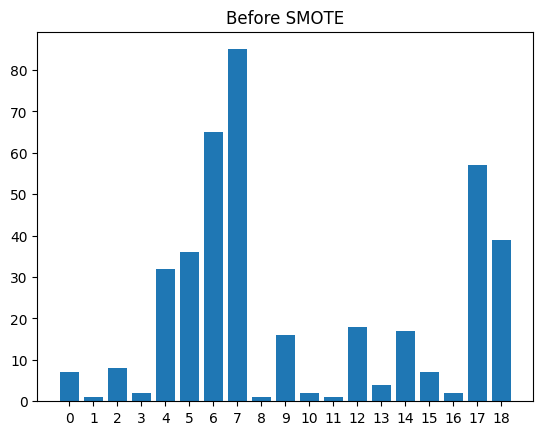

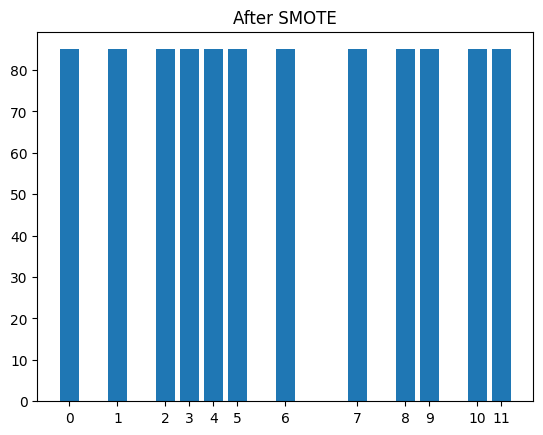

Dataset size: (500, 17)
Training set size: (1020, 29) (1020, 12)
Test set size: (78, 29) (78, 12)


In [3]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/CSE6250/1-s2.0-S2352340917303487-mmc2.csv', encoding='latin1')

# Handle missing values first
data = data.dropna()

# Separate features and labels
features = ['Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar']
X = data.drop(features, axis=1)
X['agecode'] = X['agecode'].astype(str)
y = data[features].apply(lambda x: x.str[0]).replace({'N': 0, 'P': 1})

# One-hot encode categorical variables and normalize
cat_cols = ['sex', 'faNoily_status', 'religion', 'occupation', 'genetic',
       'status', 'loss_of_parent', 'divorse', 'Injury', 'Spiritual_consult',
       'agecode']
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()
label = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', scaler, X.select_dtypes(include=['int64', 'float64']).columns),
        ('onehot', onehot, cat_cols)
    ])
feat_names = onehot.fit(X[['sex', 'faNoily_status', 'religion', 'occupation', 'genetic',
       'status', 'loss_of_parent', 'divorse', 'Injury', 'Spiritual_consult',
       'agecode']]).get_feature_names_out()
feat_names =  ['age'] + list(feat_names)

X = preprocessor.fit_transform(X)


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46290)


# Apply SMOTE oversampling for each target label separately
X_train_sm, X_test_sm, y_train_sm, y_test_sm = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
y_train_sm['All'] = label.fit_transform(y_train_sm.astype(str).values.sum(axis=1).reshape(-1, 1))
y_test_sm['All'] = label.transform(y_test_sm.astype(str).values.sum(axis=1).reshape(-1, 1))

y_train_sm = y_train_sm.drop(features, axis = 1)
y_test_sm = y_test_sm.drop(features, axis = 1)

y_train_sm = y_train_sm.reset_index(drop = True)
y_test_sm = y_test_sm.reset_index(drop = True)

# Count the number of occurrences of each class
class_counts = y_test_sm.value_counts()
under6Train = [x[0] for x in class_counts.index[class_counts <= 6].tolist()]

inds = y_test_sm.index[~y_test_sm['All'].isin(under6Train)].tolist()
y_test_sm = y_test_sm.iloc[inds]
X_test_sm = X_test_sm[inds, :]

class_counts = y_train_sm.value_counts().sort_index()

plt.bar([x[0] for x in class_counts.index.tolist()], class_counts.values, tick_label = range(len(class_counts)))
plt.title('Before SMOTE')
plt.show()

under6Train = [x[0] for x in class_counts.index[class_counts <= 6].tolist()]

inds = y_train_sm.index[~y_train_sm['All'].isin(under6Train)].tolist()
y_train_sm = y_train_sm.iloc[inds]
X_train_sm = X_train_sm[inds, :]

class_counts = class_counts.iloc[under6Train]

# Determine the majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Calculate the number of samples to generate for the minority class
num_samples = class_counts[majority_class] - class_counts[minority_class]

# Apply SMOTE only if there is a class imbalance and the minority class has at least 2 samples
smote = SMOTE(random_state=42, k_neighbors=max(1, min(5, class_counts[minority_class] - 1)))
X_train_sm, y_train_sm = smote.fit_resample(X_train_sm, y_train_sm)


class_counts = y_train_sm.value_counts().sort_index()
plt.bar([x[0] for x in class_counts.index.tolist()], class_counts.values, tick_label = range(len(class_counts)))
plt.title('After SMOTE')
plt.show()

y_train_sm_copy = y_train_sm.copy()
y_test_sm_copy = y_test_sm.copy()

y_train_sm = pd.DataFrame(onehot.fit_transform(y_train_sm))
y_test_sm = pd.DataFrame(onehot.transform(y_test_sm))

y_train_sm_copy = pd.DataFrame(label.inverse_transform(y_train_sm_copy), columns = ['STR'])
y_train_sm_copy = y_train_sm_copy.STR.apply(list)
y_train_sm_copy = pd.DataFrame(y_train_sm_copy.values.tolist(), columns = features).astype(int)

y_test_sm_copy = pd.DataFrame(label.inverse_transform(y_test_sm_copy), columns = ['STR'])
y_test_sm_copy = y_test_sm_copy.STR.apply(list)
y_test_sm_copy = pd.DataFrame(y_test_sm_copy.values.tolist(), columns = features).astype(int)

# Print dataset statistics
print("Dataset size:", data.shape)
print("Training set size:", X_train_sm.shape, y_train_sm.shape)
print("Test set size:", X_test_sm.shape, y_test_sm.shape)

# Model Architecture and Code Structure

## Model Architectures:

### Deep Learning (MLP):
- **Input Layer:** 29 nodes (one-hot encoded features) after One Hot Encoding the column vector is length 29 in the paper they mention also concatenating the encodings after to make a psuedo-labelencoder, instead we keep the one hot encoding mentioned in the paper.
- **Hidden Layers:** 3 layers with 20, 20, and 40 nodes respectively.
- **Output Layer:** 5 nodes (one for each PDD label).
- **Activation Functions:** ReLU for hidden layers, sigmoid for output layer.
- **Regularization:** Dropout layers

### Machine Learning:
- **Support Vector Machine (SVM) with RBF kernel.**
- **Random Forest (RF) with 100 trees.**
- **Decision Tree (DT) with Gini impurity criterion.**

## Training Objectives:

- **Loss Function:** Binary cross-entropy for MLP, as it is a multi-label classification task.
- **Optimizer:** Adam with learning rate 0.01.
- **Epochs:** 40 with early stopping based on validation loss.
- **Batch Size:** 50.

## Other Details:

- The models are trained from scratch without any pretraining.
- 5-fold cross-validation is used for hyperparameter tuning.

## Code Structure:

- Define a `Classify` class with an 'MLP' function built in Keras with the specified architecture.
- Implement functions for training, validation, and testing the MLP model.
- Use scikit-learn library for SVM, RF, and DT models.
- Develop functions to train and evaluate these models with the same data splits as MLP.
- Save the best performing models for each architecture.
- Run multiple experiments with different target variables and imbalanced vs balanced datasets


In [288]:
class classify:
  def __init__(self, X_train, y_train, X_test, y_test, epochs = 40, batch_size = 50, patience = 10, output_size = 5, loss = 'binary_crossentropy', threshold = .5, otherModels = True, feat_names = None, rtrn = False, confusion = False):
    self.input_shape = X_train.shape[1]
    self.X_train = X_train
    self.y_train = y_train.to_numpy()
    self.X_test = X_test
    self.y_test = y_test.to_numpy()
    self.epochs = epochs
    self.batch_size = batch_size
    self.patience = patience
    self.output_size = output_size
    self.loss = loss
    self.threshold = threshold
    self.otherModels = otherModels
    self.featNames = feat_names
    self.rtrn = rtrn
    self.confusion = confusion

  def create_mlp(self):
    model = Sequential([
        Dropout(0.1, input_shape=(self.input_shape,)),
        Dense(20, activation='relu', input_shape=(self.input_shape,)),
        Dropout(0.1, input_shape=(20,)),
        Dense(20, activation='relu'),
        Dropout(0.5, input_shape=(20,)),
        Dense(40, activation='relu'),
        Dropout(0.5, input_shape=(40,)),
        Dense(self.output_size, activation='sigmoid')
      ])
    model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), loss=self.loss, metrics=['accuracy'])
    return model

  def plotCurves(self, training, validation, label1, label2, ylabel, title):
    plt.figure(figsize=(8, 5))
    plt.plot(training, label=label1)
    plt.plot(validation, label=label2)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

  def plotFeatImportance(self, rf_model):
    importances = rf_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

    forest_importances = pd.Series(importances, index=self.featNames)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

  def plotConfusion(self, preds, true):
    conf = confusion_matrix(true, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf)
    disp.plot()

  def experiment(self, otherModels = True):
    early_stop = EarlyStopping(monitor='val_loss', patience=self.patience, restore_best_weights=True)
    mlp_model = self.create_mlp()
    history = mlp_model.fit(self.X_train, self.y_train, epochs=self.epochs, batch_size=self.batch_size, validation_data = (self.X_test, self.y_test), callbacks=[early_stop], verbose=0)

    self.plotCurves(history.history['loss'], history.history['val_loss'], 'Training Loss', 'Validation Loss', 'Loss', 'Training and Validation Loss')
    self.plotCurves(history.history['accuracy'], history.history['val_accuracy'], 'Training Accuracy', 'Validation Accuracy', 'Accuracy', 'Training and Validation Accuracy')


    if otherModels:
      rf_params = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 5, 10],
      'min_samples_split': [2, 5, 10]
      }
      rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
      rf_grid.fit(self.X_train, self.y_train)
      rf_model = rf_grid.best_estimator_

      self.plotFeatImportance(rf_model)

      svm_model = OneVsRestClassifier(SVC(random_state=42))
      svm_model.fit(self.X_train, self.y_train)

      dt_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
      dt_model.fit(self.X_train, self.y_train)

    mlp_preds = mlp_model.predict(self.X_test)
    rf_preds = rf_model.predict(self.X_test) if otherModels else None
    svm_preds = svm_model.predict(self.X_test) if otherModels else None
    dt_preds = dt_model.predict(self.X_test) if otherModels else None


    if self.confusion:
      labels = np.argmax(mlp_preds, axis = 1)
      true = np.argmax(self.y_test, axis = 1)
      self.plotConfusion(labels, true)

    threshold = self.threshold
    mlp_preds = (mlp_preds > threshold).astype(int)


    return [('MLP', mlp_preds), ('Random Forest', rf_preds), ('SVM', svm_preds), ('Decision Tree', dt_preds)]

  def scoreModel(self, predicts, metricName):
    print(f"{metricName}:")
    print("Accuracy:", accuracy_score(self.y_test.flatten(), predicts.flatten()))
    print("Precision:", precision_score(self.y_test, predicts, average='micro'))
    print("Recall:", recall_score(self.y_test, predicts, average='micro'))
    print("F1-score:", f1_score(self.y_test, predicts, average='micro'), '\n')

  def runExperiment(self, experimentName):
    print(experimentName + ':')

    predictions = self.experiment(self.otherModels)

    for prediction in predictions:
      if isinstance(prediction[1], np.ndarray):
        self.scoreModel(prediction[1], prediction[0])

    if self.rtrn:
      return (roc_curve(predictions[0][1], self.y_test), roc_auc_score(predictions[0][1], self.y_test))

    return None

# Results

## Model comparison

Normal Multiclassification:


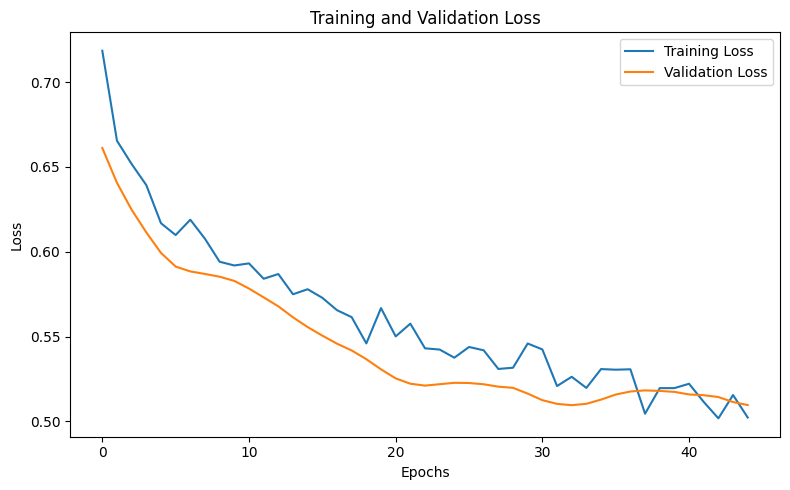

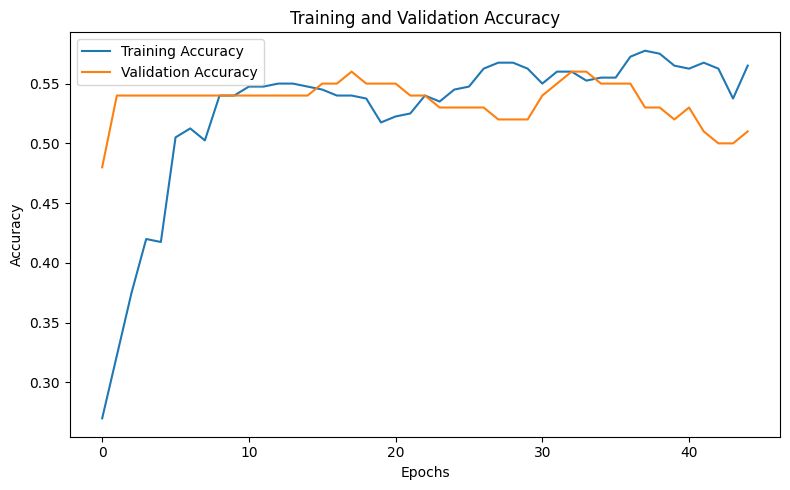

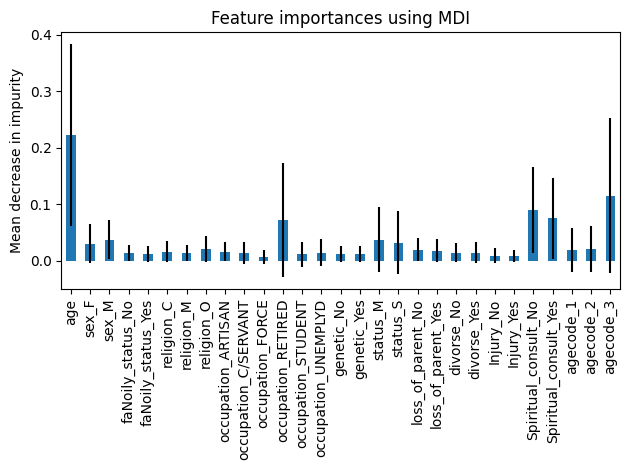

4/4 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.754
Precision: 0.762589928057554
Recall: 0.7881040892193308
F1-score: 0.7751371115173675 

Random Forest:
Accuracy: 0.786
Precision: 0.824
Recall: 0.7657992565055762
F1-score: 0.7938342967244703 

SVM:
Accuracy: 0.79
Precision: 0.8178294573643411
Recall: 0.7843866171003717
F1-score: 0.8007590132827325 

Decision Tree:
Accuracy: 0.72
Precision: 0.7186440677966102
Recall: 0.7881040892193308
F1-score: 0.7517730496453899 



In [289]:
clf = classify(X_train, y_train, X_test, y_test, epochs = 50, batch_size = 250, patience = 12, output_size = 5, feat_names = feat_names)

clf.runExperiment('Normal Multiclassification')

Smote Multiclassification:


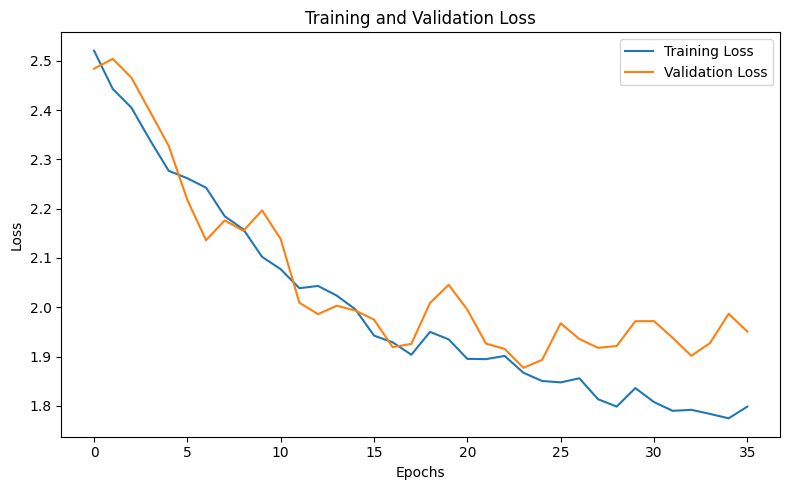

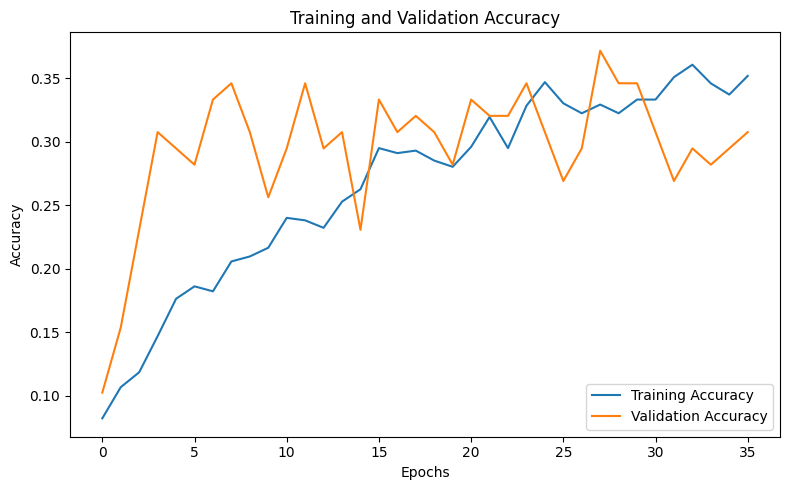

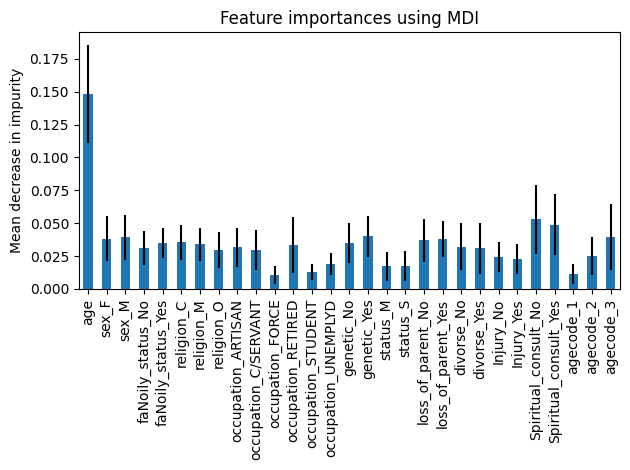

3/3 [==============================] - 0s 5ms/step
MLP:
Accuracy: 0.655982905982906
Precision: 0.1806282722513089
Recall: 0.8846153846153846
F1-score: 0.3 

Random Forest:
Accuracy: 0.9230769230769231
Precision: 0.6
Recall: 0.23076923076923078
F1-score: 0.33333333333333337 

SVM:
Accuracy: 0.9113247863247863
Precision: 0.35294117647058826
Recall: 0.07692307692307693
F1-score: 0.12631578947368421 

Decision Tree:
Accuracy: 0.8835470085470085
Precision: 0.3258426966292135
Recall: 0.3717948717948718
F1-score: 0.3473053892215569 



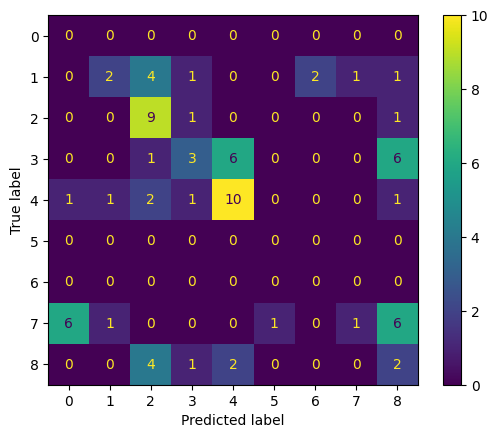

In [290]:
clf = classify(X_train_sm, y_train_sm, X_test_sm, y_test_sm, epochs = 50, batch_size = 250, patience = 12, output_size = y_test_sm.shape[1], threshold = .5, loss = 'categorical_crossentropy', feat_names = feat_names, confusion=True)

clf.runExperiment('Smote Multiclassification')

In [291]:
def runMoreExperiments(X_train, X_test, y_train, y_test, features, title, rtrn = False, otherModels = True):
  preds = []
  for feat in features:
    temp_y_train = y_train[feat]
    temp_y_test = y_test[feat]

    #nonfeat = [f for f in features if f != feat]
    #X_train = np.append(X_train, np.array(y_train[nonfeat]), 1)
    #X_test = np.append(X_test, np.array(y_test[nonfeat]), 1)

    clf = classify(X_train, temp_y_train, X_test, temp_y_test, epochs = 50, batch_size = 250, patience = 12, output_size = 1, threshold = .5, otherModels = otherModels, feat_names = feat_names, rtrn = rtrn)

    preds.append(clf.runExperiment(f'{title} Single Classification ({feat})'))

  if rtrn:
    for i, pred in enumerate(preds):
      plt.plot(pred[0][0], pred[0][1], label = f"{features[i]} auc = {pred[1]}")
    plt.legend()
    plt.show()

Imbalanced Single Classification (Insominia):


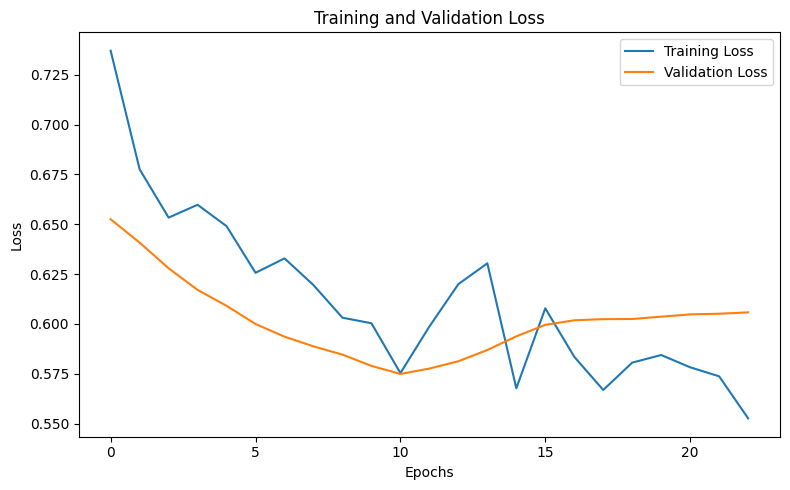

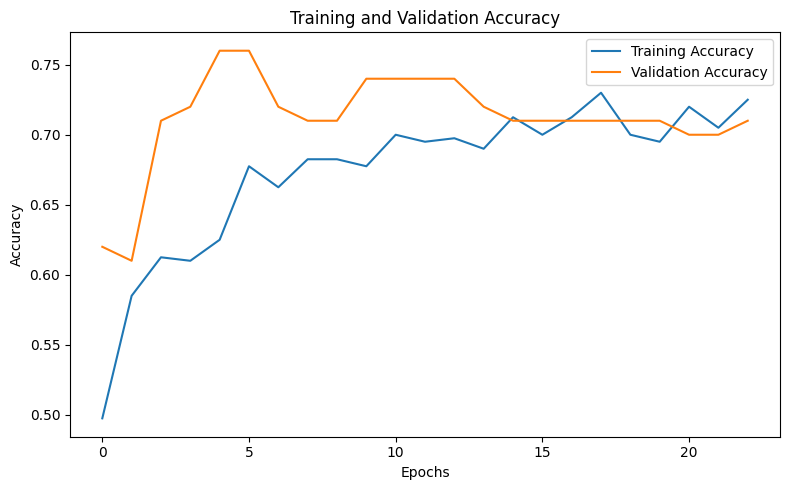

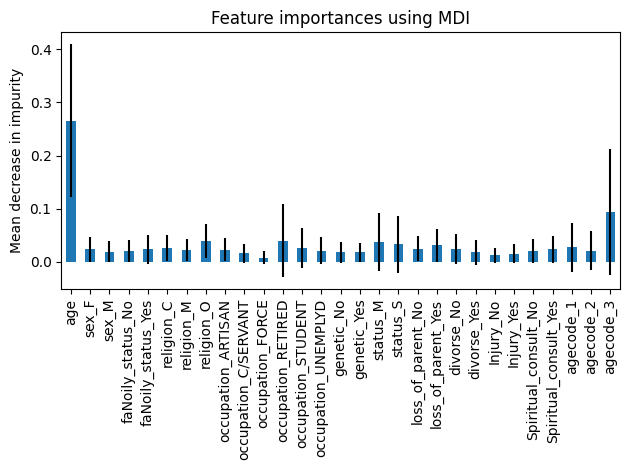

4/4 [==============================] - 0s 3ms/step
MLP:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

Random Forest:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

SVM:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

Decision Tree:
Accuracy: 0.63
Precision: 0.63
Recall: 0.63
F1-score: 0.63 

Imbalanced Single Classification (shizopherania):


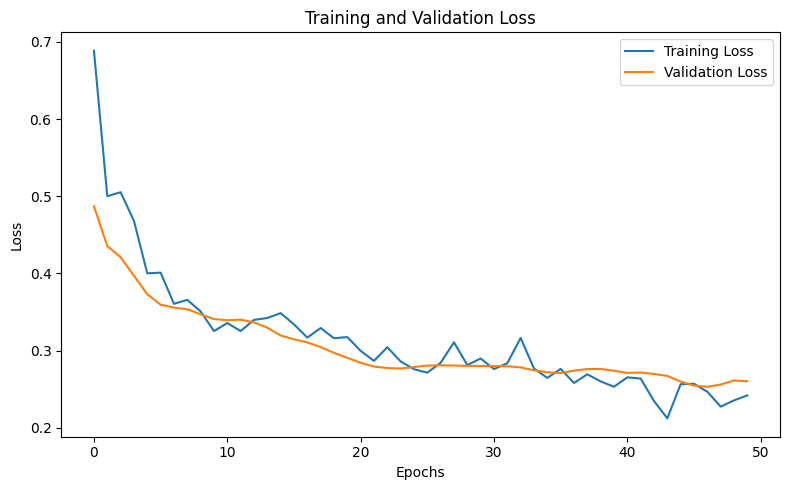

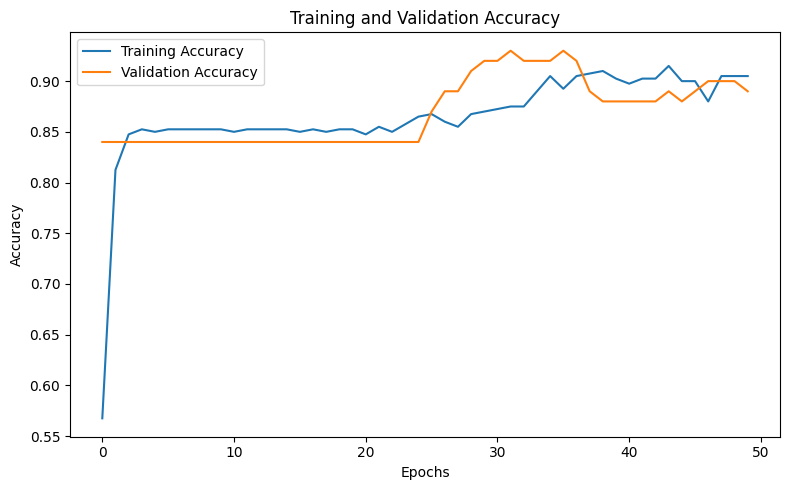

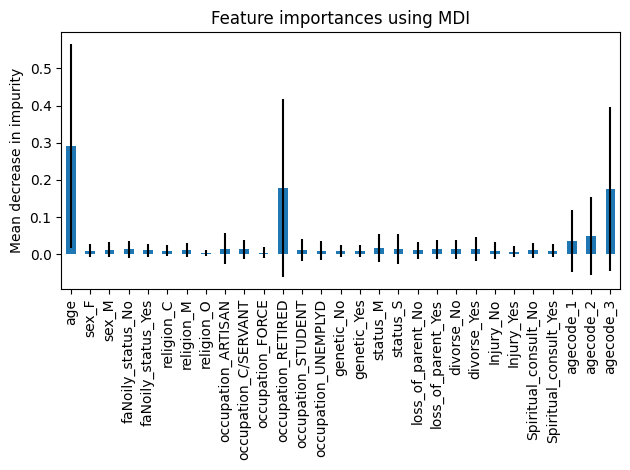

4/4 [==============================] - 0s 5ms/step
MLP:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89 

Random Forest:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-score: 0.94 

SVM:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-score: 0.92 

Decision Tree:
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-score: 0.8599999999999999 

Imbalanced Single Classification (vascula_demetia):


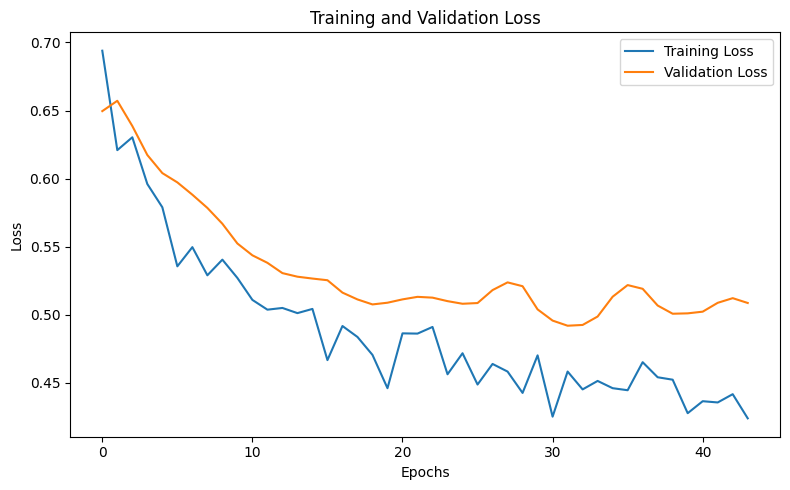

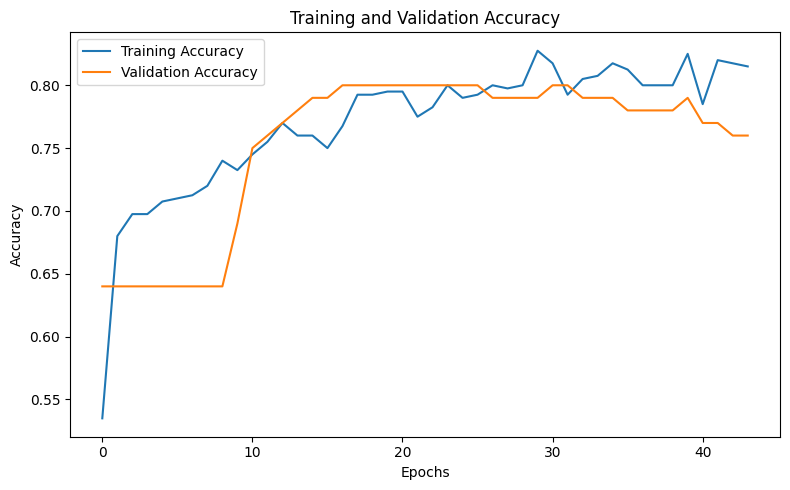

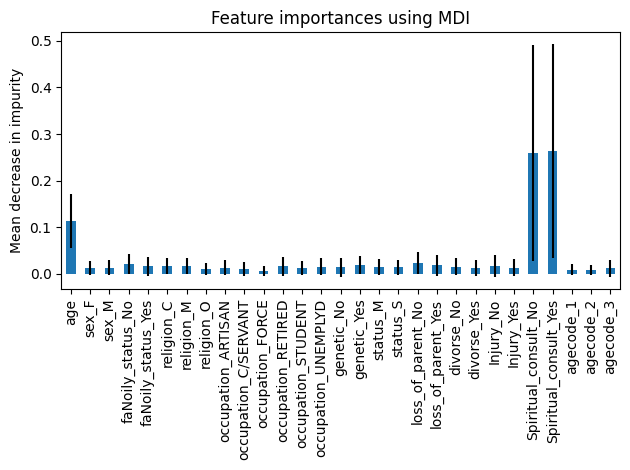

4/4 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002 

Random Forest:
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.78 

SVM:
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002 

Decision Tree:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.7299999999999999 

Imbalanced Single Classification (MBD):


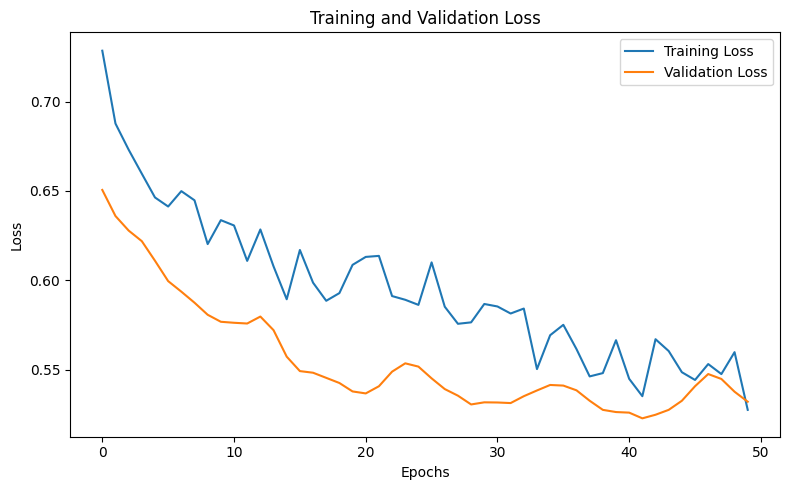

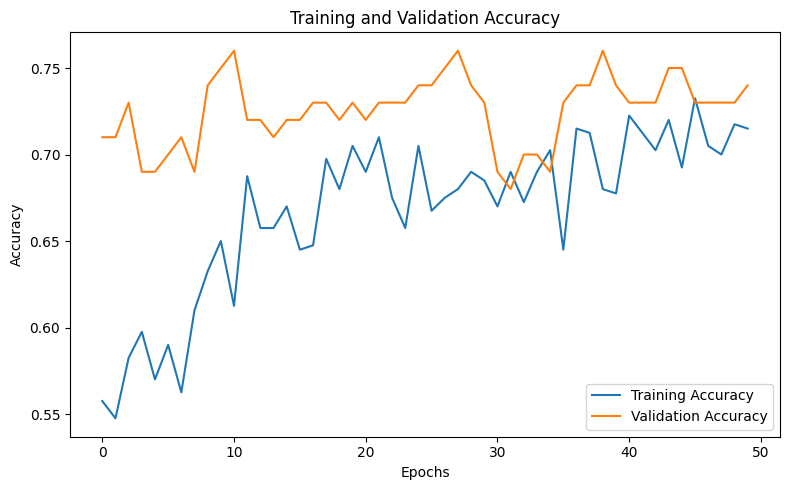

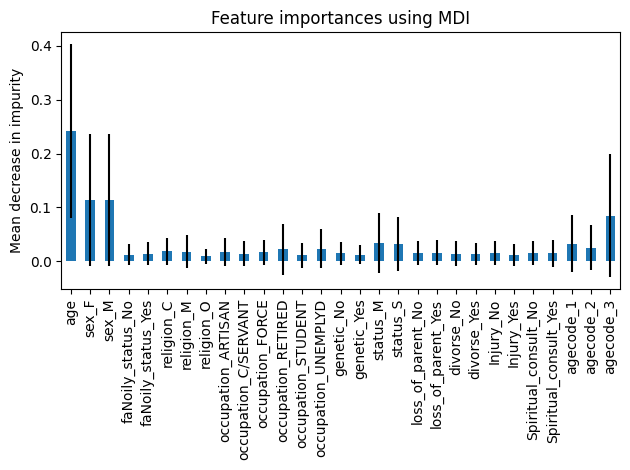

4/4 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

Random Forest:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

SVM:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

Decision Tree:
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-score: 0.75 

Imbalanced Single Classification (Bipolar):


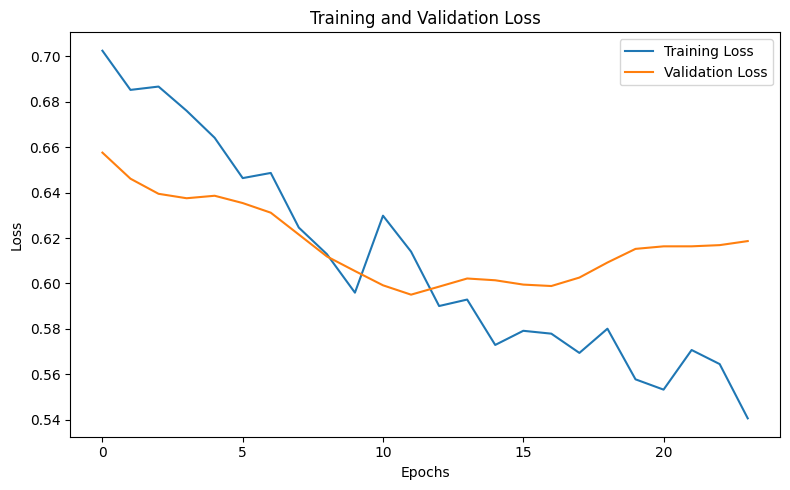

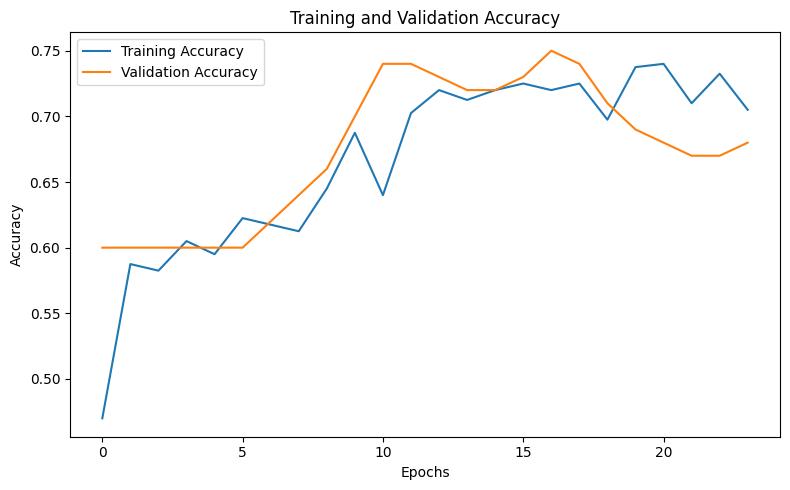

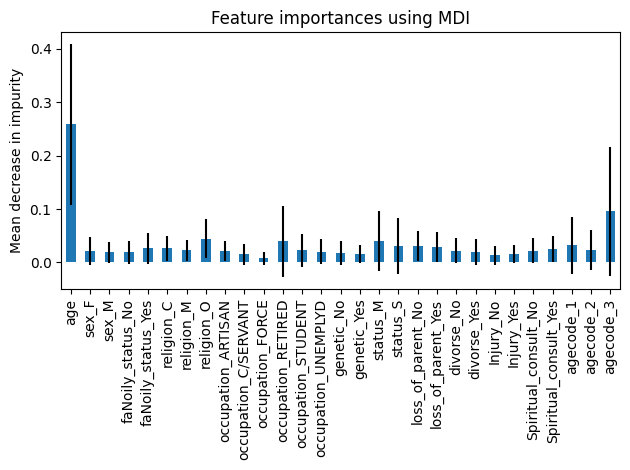

4/4 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74 

Random Forest:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.7299999999999999 

SVM:
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-score: 0.75 

Decision Tree:
Accuracy: 0.63
Precision: 0.63
Recall: 0.63
F1-score: 0.63 



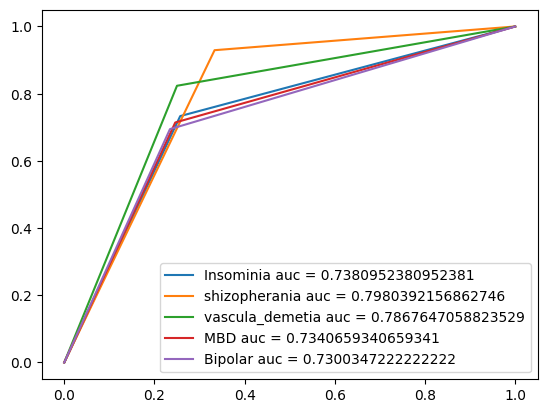

In [292]:
runMoreExperiments(X_train, X_test, y_train, y_test, features, 'Imbalanced', True)

Balanced Single Classification (Insominia):


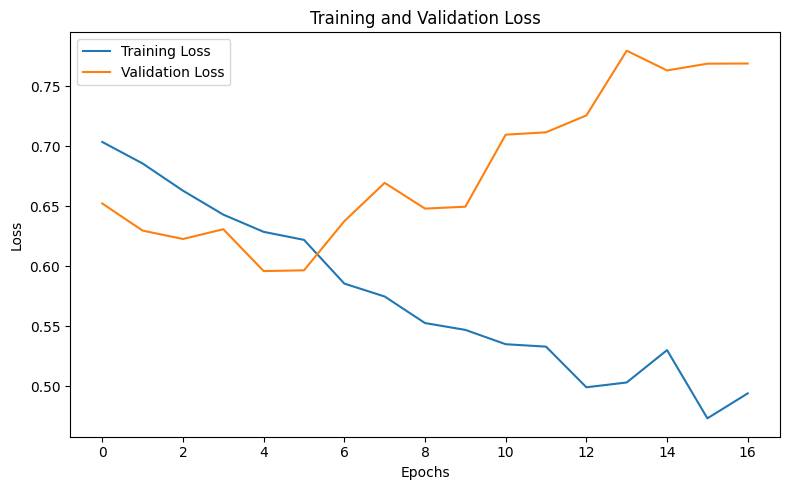

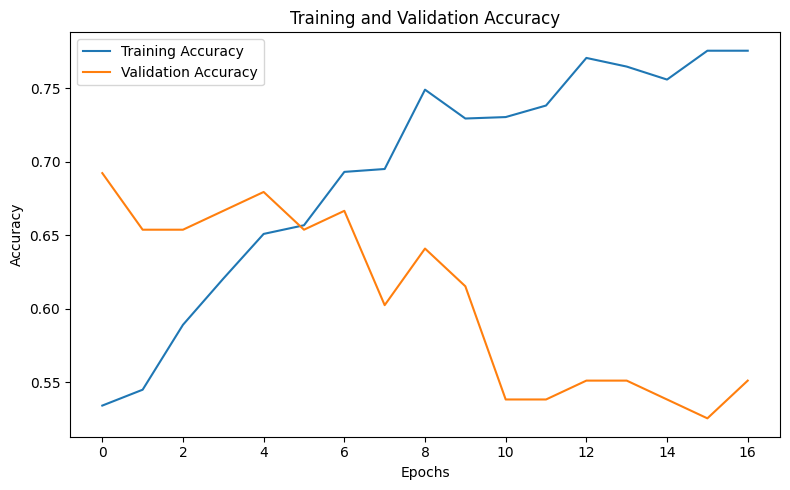

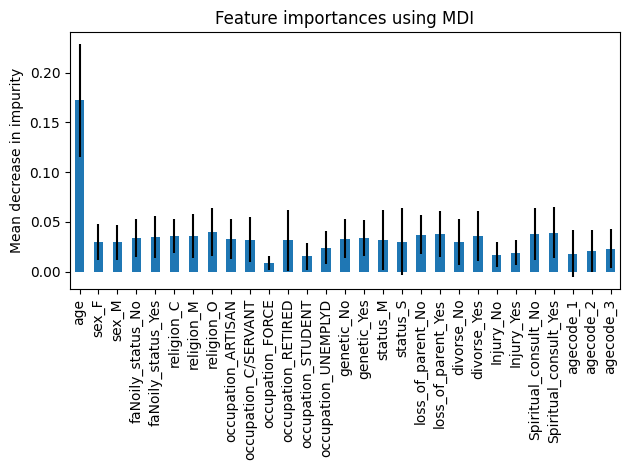

3/3 [==============================] - 0s 7ms/step
MLP:
Accuracy: 0.6794871794871795
Precision: 0.6794871794871795
Recall: 0.6794871794871795
F1-score: 0.6794871794871795 

Random Forest:
Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666 

SVM:
Accuracy: 0.5769230769230769
Precision: 0.5769230769230769
Recall: 0.5769230769230769
F1-score: 0.5769230769230769 

Decision Tree:
Accuracy: 0.6538461538461539
Precision: 0.6538461538461539
Recall: 0.6538461538461539
F1-score: 0.6538461538461539 

Balanced Single Classification (shizopherania):


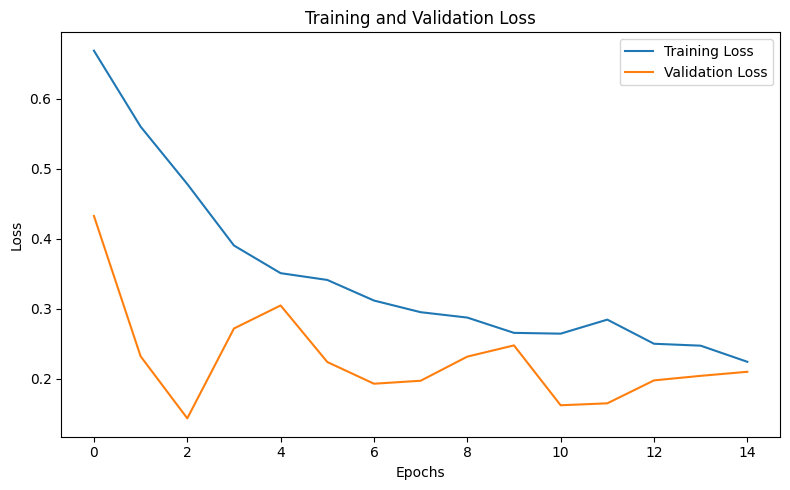

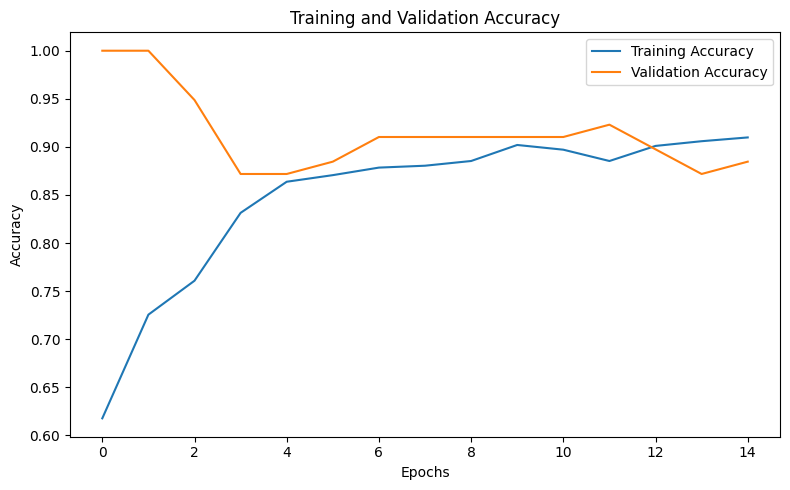

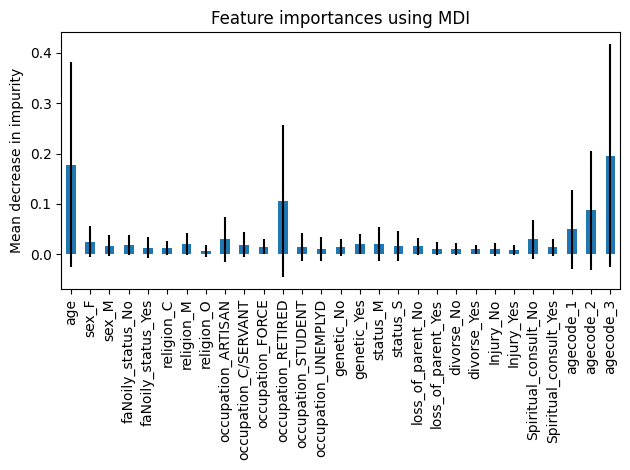

3/3 [==============================] - 0s 6ms/step
MLP:
Accuracy: 0.9487179487179487
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1-score: 0.9487179487179487 

Random Forest:
Accuracy: 0.9487179487179487
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1-score: 0.9487179487179487 

SVM:
Accuracy: 0.9615384615384616
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1-score: 0.9615384615384616 

Decision Tree:
Accuracy: 0.9487179487179487
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1-score: 0.9487179487179487 

Balanced Single Classification (vascula_demetia):


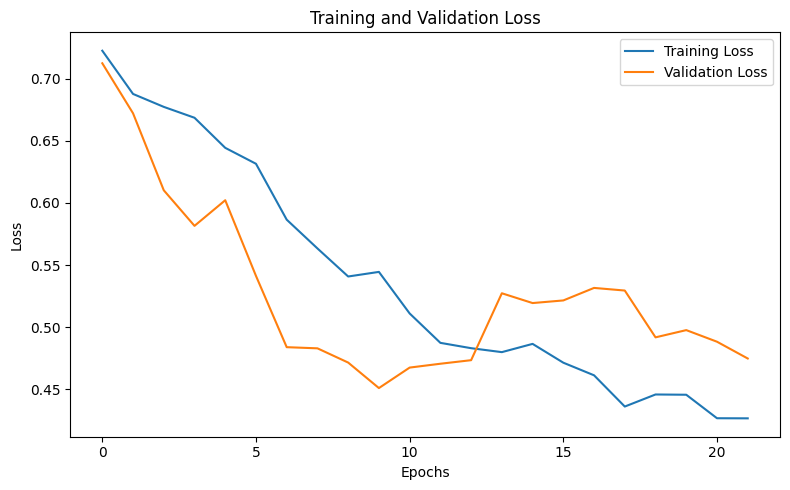

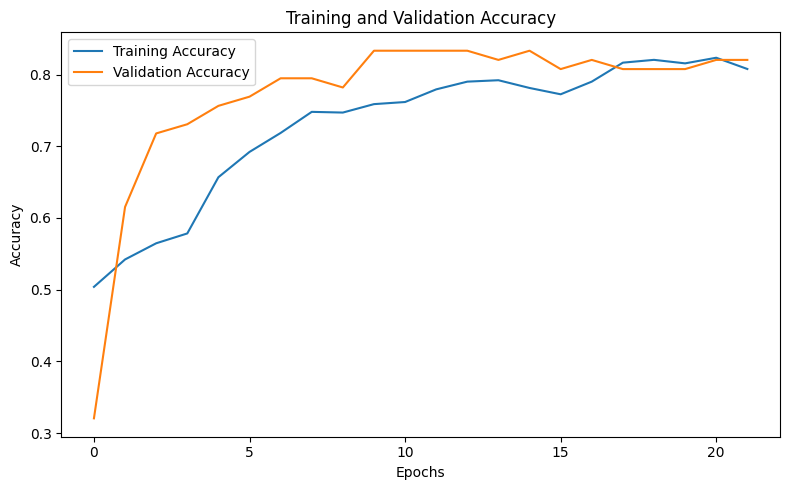

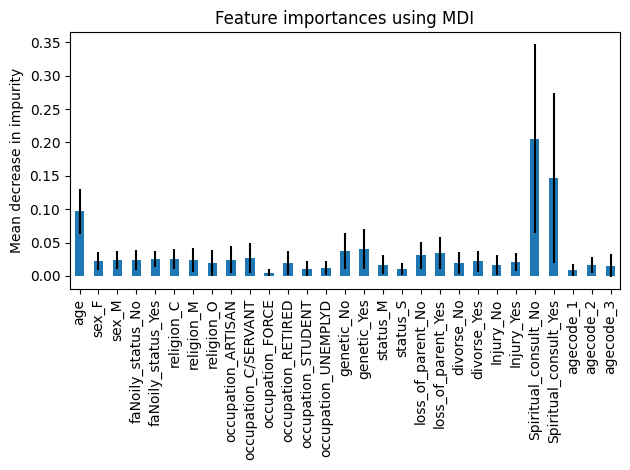

3/3 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.8333333333333334
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-score: 0.8333333333333334 

Random Forest:
Accuracy: 0.8205128205128205
Precision: 0.8205128205128205
Recall: 0.8205128205128205
F1-score: 0.8205128205128205 

SVM:
Accuracy: 0.8205128205128205
Precision: 0.8205128205128205
Recall: 0.8205128205128205
F1-score: 0.8205128205128205 

Decision Tree:
Accuracy: 0.7564102564102564
Precision: 0.7564102564102564
Recall: 0.7564102564102564
F1-score: 0.7564102564102565 

Balanced Single Classification (MBD):


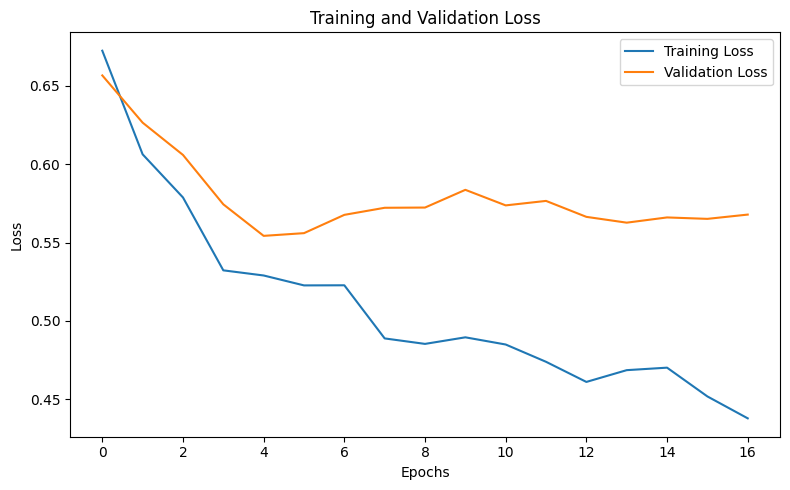

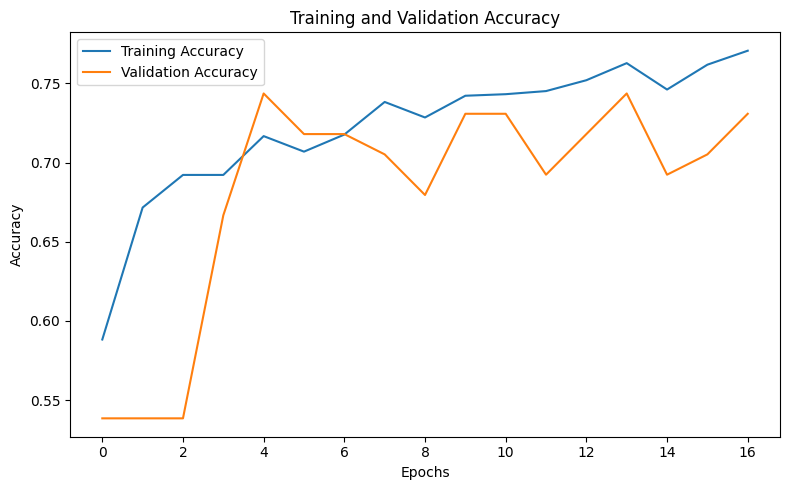

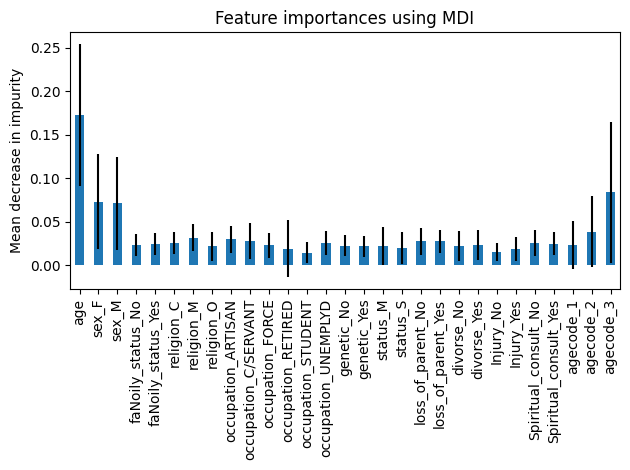

3/3 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.7435897435897436
Precision: 0.7435897435897436
Recall: 0.7435897435897436
F1-score: 0.7435897435897437 

Random Forest:
Accuracy: 0.7307692307692307
Precision: 0.7307692307692307
Recall: 0.7307692307692307
F1-score: 0.7307692307692306 

SVM:
Accuracy: 0.6923076923076923
Precision: 0.6923076923076923
Recall: 0.6923076923076923
F1-score: 0.6923076923076923 

Decision Tree:
Accuracy: 0.717948717948718
Precision: 0.717948717948718
Recall: 0.717948717948718
F1-score: 0.717948717948718 

Balanced Single Classification (Bipolar):


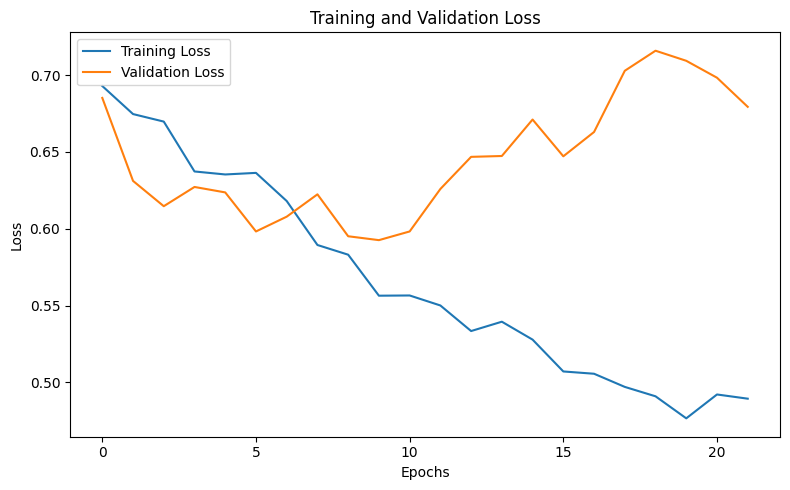

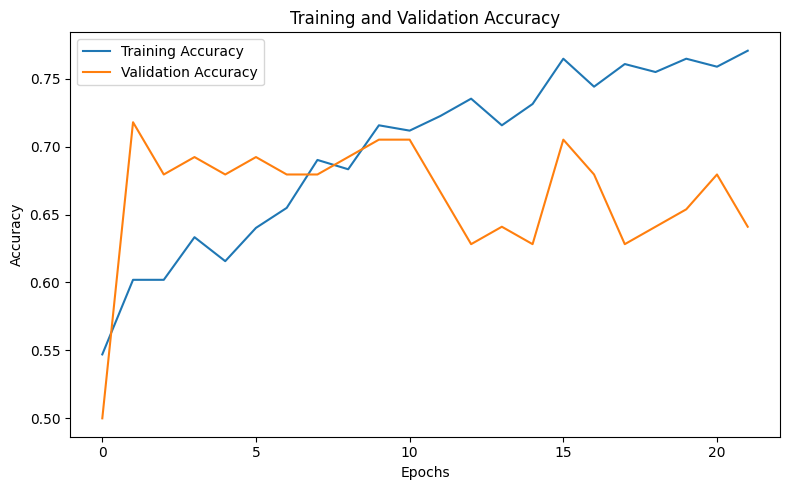

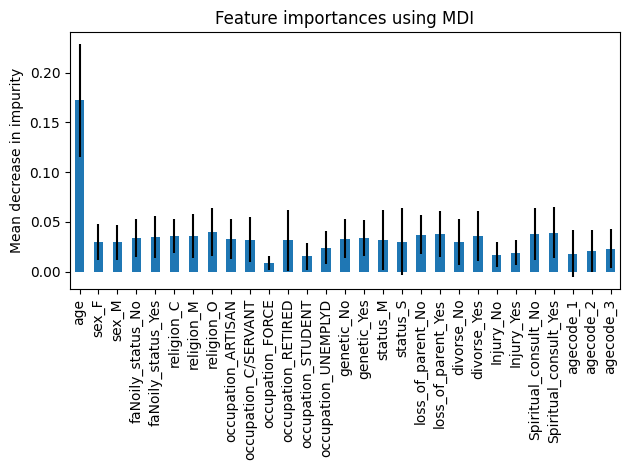

3/3 [==============================] - 0s 4ms/step
MLP:
Accuracy: 0.7051282051282052
Precision: 0.7051282051282052
Recall: 0.7051282051282052
F1-score: 0.7051282051282052 

Random Forest:
Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666 

SVM:
Accuracy: 0.5769230769230769
Precision: 0.5769230769230769
Recall: 0.5769230769230769
F1-score: 0.5769230769230769 

Decision Tree:
Accuracy: 0.6538461538461539
Precision: 0.6538461538461539
Recall: 0.6538461538461539
F1-score: 0.6538461538461539 



In [293]:
runMoreExperiments(X_train_sm, X_test_sm, y_train_sm_copy, y_test_sm_copy, features, 'Balanced', otherModels = False)

# Model Evaluation Metrics and Analysis

## Imbalanced MultiClassification:

### MLP:

- **Accuracy:** 0.754
- **Precision:** 0.7626
- **Recall:** 0.7881
- **F1-score:** 0.7751

The MLP shows a decent prediction metric, but ultimately fails to be beat Random Forest and SVM. We achieve above a 75% accuracy score, but it seem traditional machine learning still beats the MLP on this small dataset, which is to be expected in a general sense.

Training Graphs:

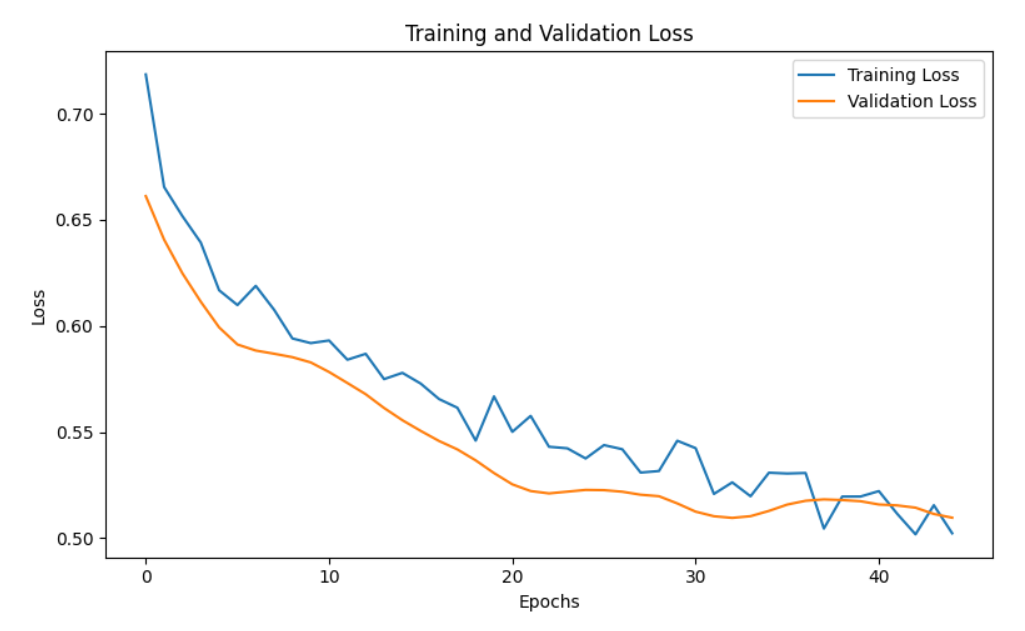

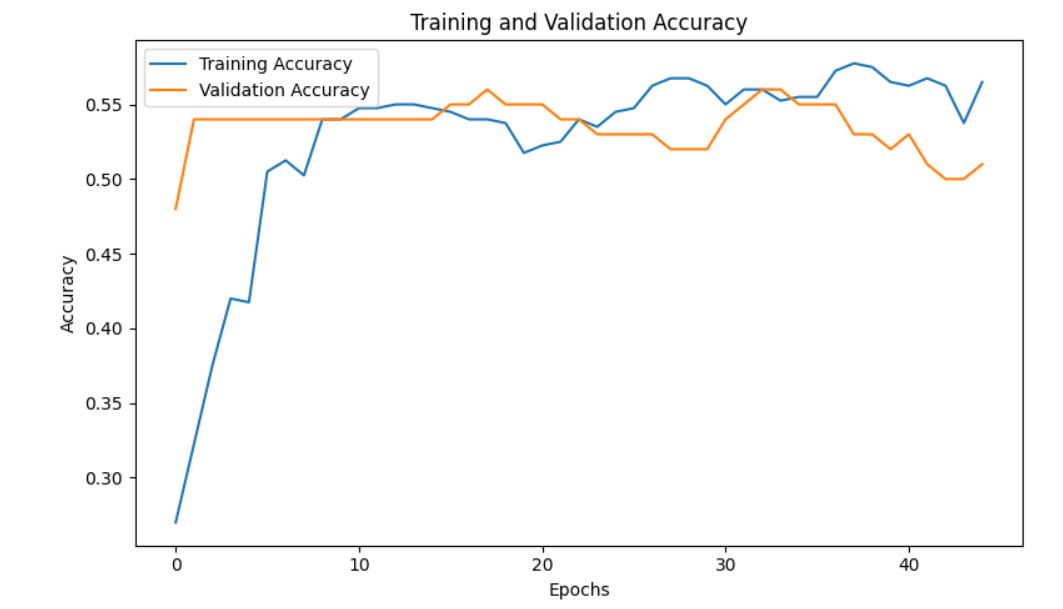


As one can see the model does not seem to be overfitting which is good considering the small size of the dataset

### RF Metrics:

- **Accuracy:** 0.786
- **Precision:** 0.824
- **Recall:** 0.7658
- **F1-score:** 0.7938

The Random Forest shows to be the second best model in our instance of training. However, the SVM and MLP models are realtively close to it in performance. In addition, we can see that age has a tremendous affect on predictions and it seems the older a patient is the more likely for positive predictions.

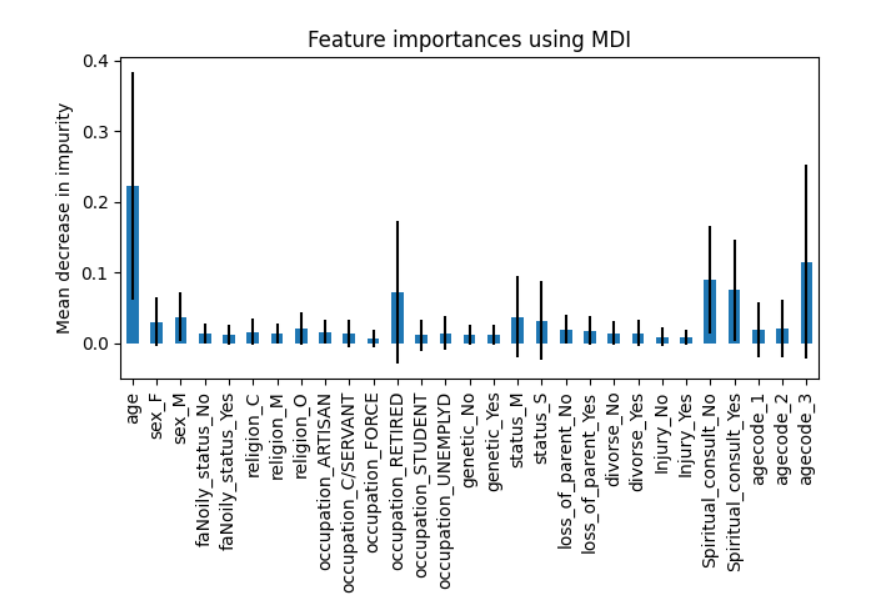

### SVM Metrics:

- **Accuracy:** 0.79
- **Precision:** 0.824
- **Recall:** 0.7658
- **F1-score:** 0.7938

The Support Vector Machine (SVM) model show to be the best model on the imbalance which is different than the hyptohesis expected.

### DT Metrics:

- **Accuracy:** 0.72
- **Precision:** 0.7186
- **Recall:** 0.7881
- **F1-score:** 0.7518

The Decision Tree (DT) model has the lowest accuracy among all models, it does not show to be as effective in thise multiclassification task.

## Balanced MultiClassification:

### MLP:

- **Accuracy:** 0.6559
- **Precision:** 0.1806
- **Recall:** 0.8846
- **F1-score:** 0.3 

The MLP actually performs better on our balanced dataset than the paper. Yet, it still massively underperforms the random forest, SVM, and Decision Tree. We can also see its predictions on this confusion matrix to determine how it misclassifies.

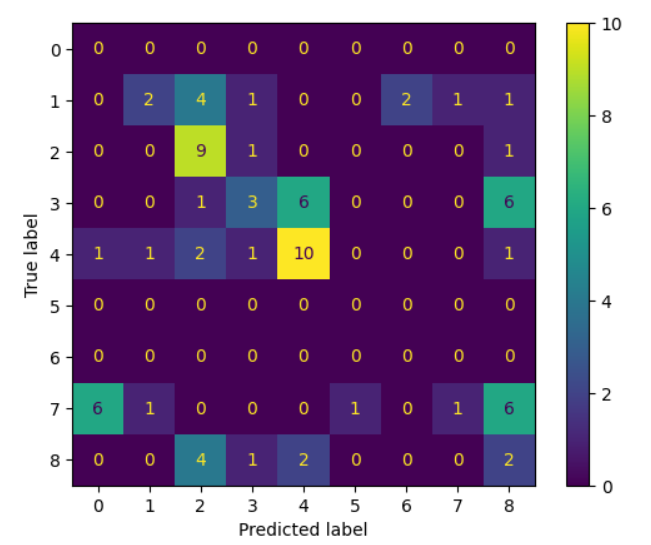

It is to be noted that this run only found 9 classes to guess from and the model does not perform very well except for a few cases. Notably this is a harder classification as it requires all classes to be predicted correctly to count towards the score.

Training Metrics:

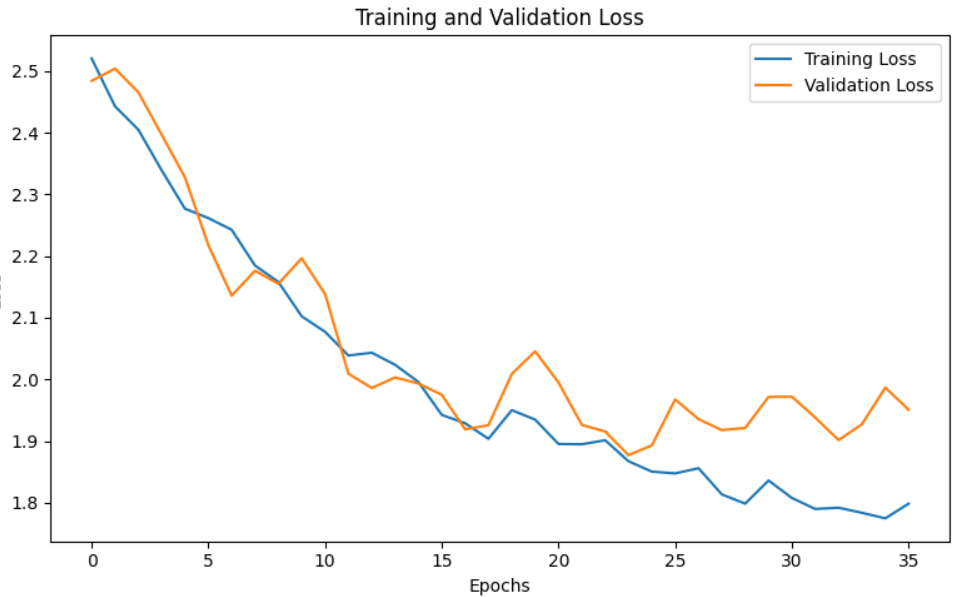

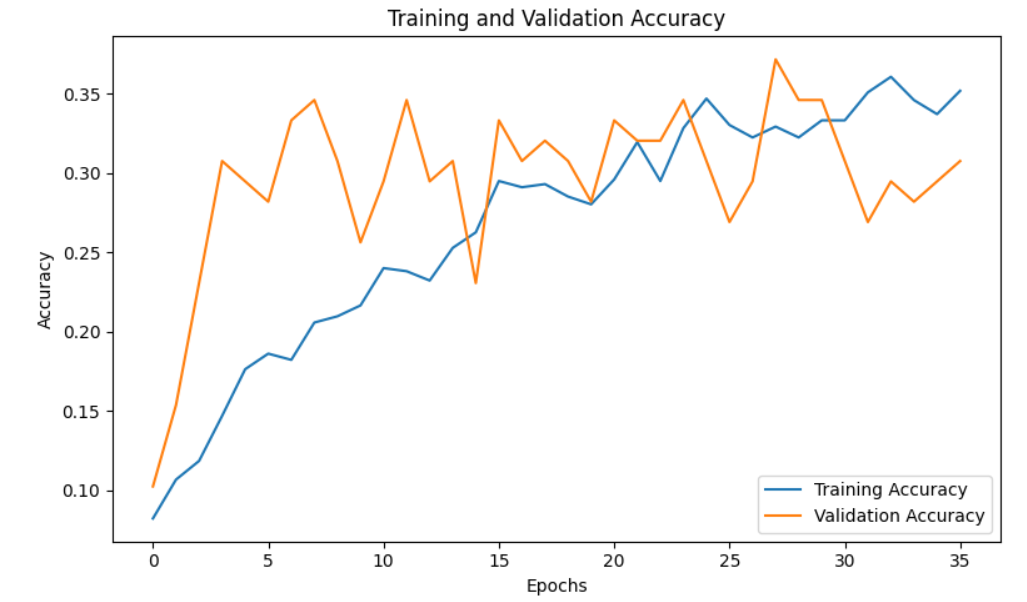

In this run we can see that the model starts to overfit the data

### RF Metrics:

- **Accuracy:** 0.9230
- **Precision:** 0.6
- **Recall:** 0.2307
- **F1-score:** 0.3333

The Random Forest shows to be best model on the balanced dataset in terms of accuracy and precision. This is inline with the hypothesis that the paper proves. In addition, age is again shown to be the most predictive feature

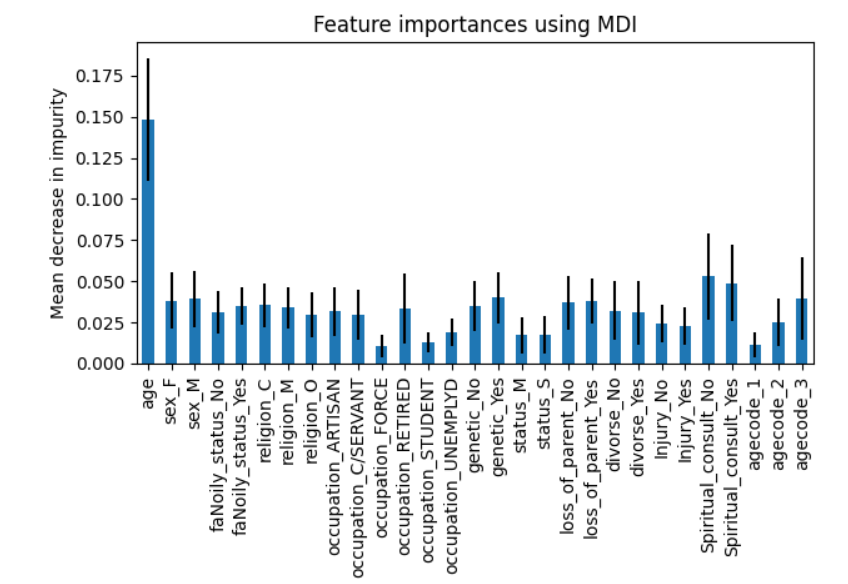

### SVM Metrics:

- **Accuracy:** 0.9113
- **Precision:** 0.3529
- **Recall:** 0.7692
- **F1-score:** 0.1263

The Support Vector Machine (SVM) model still performs very well but is not the champion in the balanced dataset.

### DT Metrics:

- **Accuracy:** 0.8835
- **Precision:** 0.3258
- **Recall:** 0.3718
- **F1-score:** 0.3473

The Decision Tree (DT) model performs decently in this bout but does not come out as victorious

## Imbalanced Single Classification:

### MLP (Insomnia):

- **Accuracy:** 0.74

Feature Importance From Random Forest:

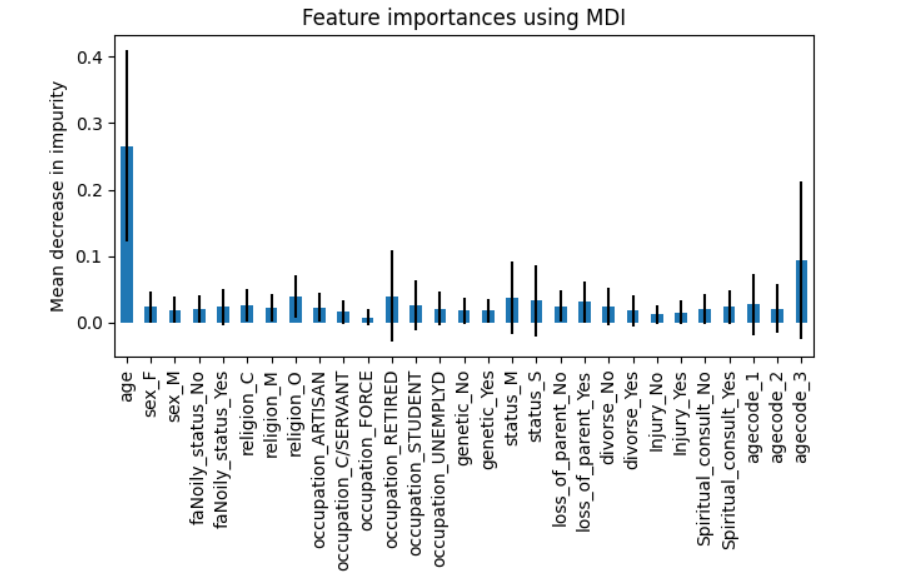

### MLP (Schizophrenia):

- **Accuracy:** 0.89

Feature Importance From Random Forest:

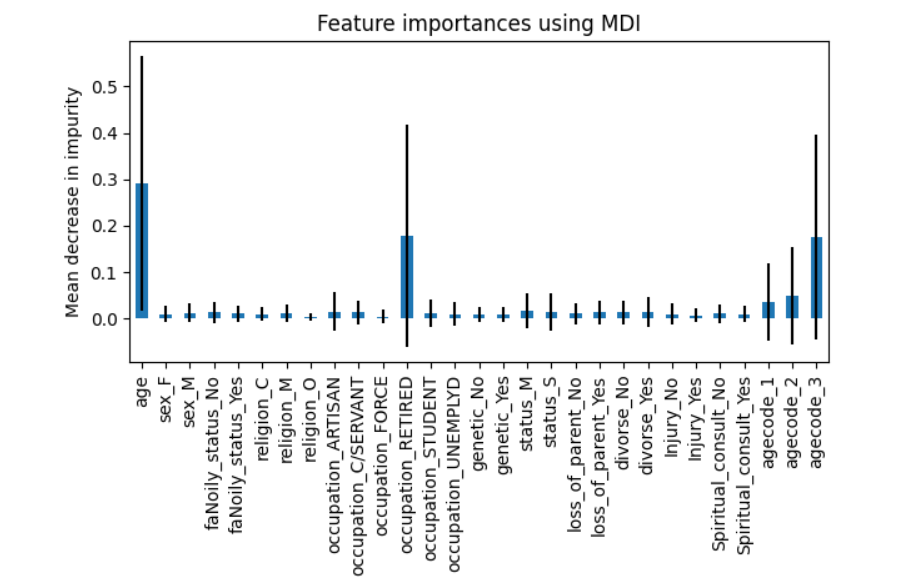

### MLP (Dementia):

- **Accuracy:** 0.8

Feature Importance From Random Forest:

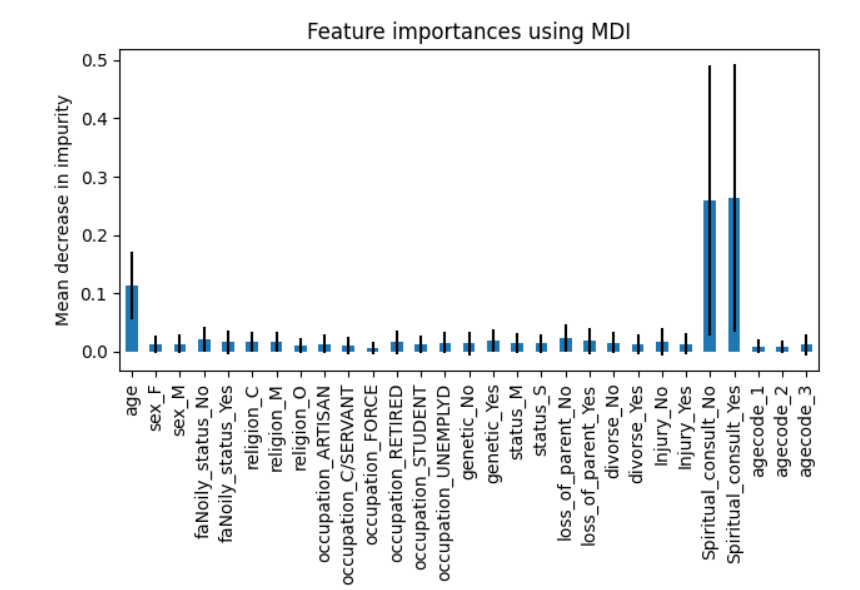

### MLP (ADHD):

- **Accuracy:** 0.74

Feature Importance From Random Forest:

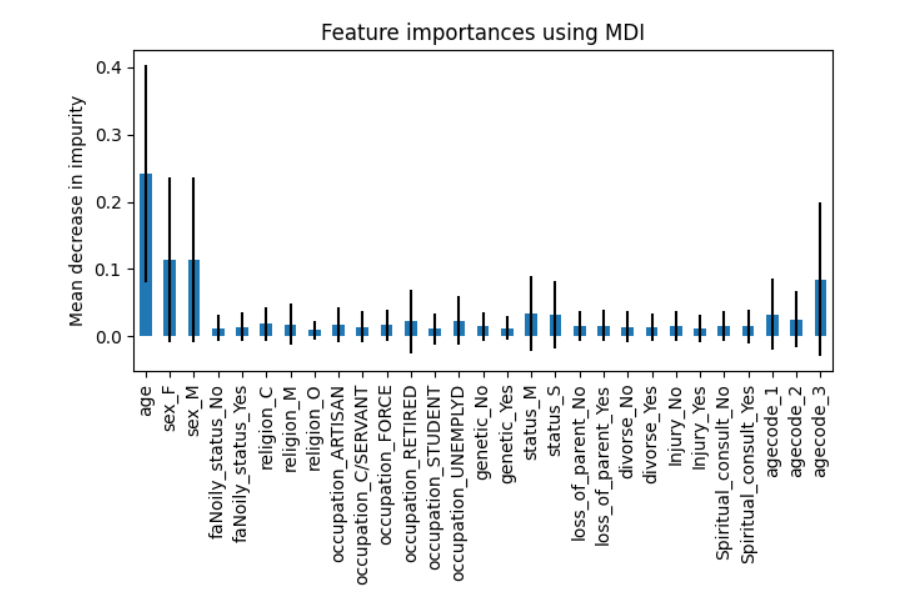

### MLP (Bipolar):

- **Accuracy:** 0.74

Feature Importance From Random Forest:

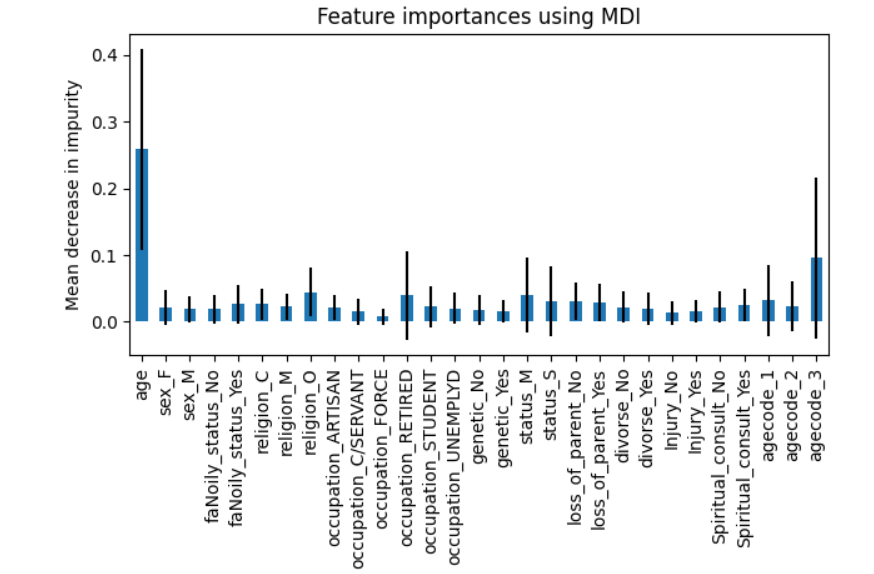

AUC Scores of Individual Predictions with MLP:

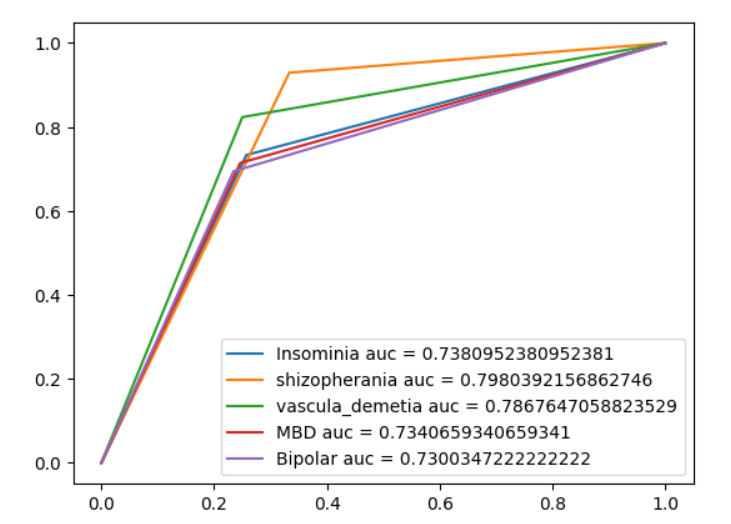


## Balanced Single Classification:

### MLP (Insomnia):

- **Accuracy:** 0.6795

Feature Importance From Random Forest:

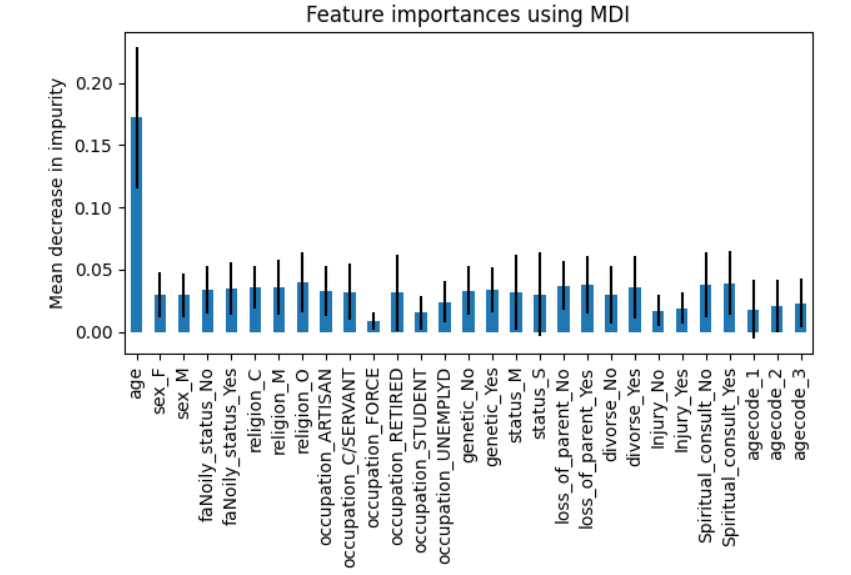

### MLP (Schizophrenia):

- **Accuracy:** 0.9487

Feature Importance From Random Forest:

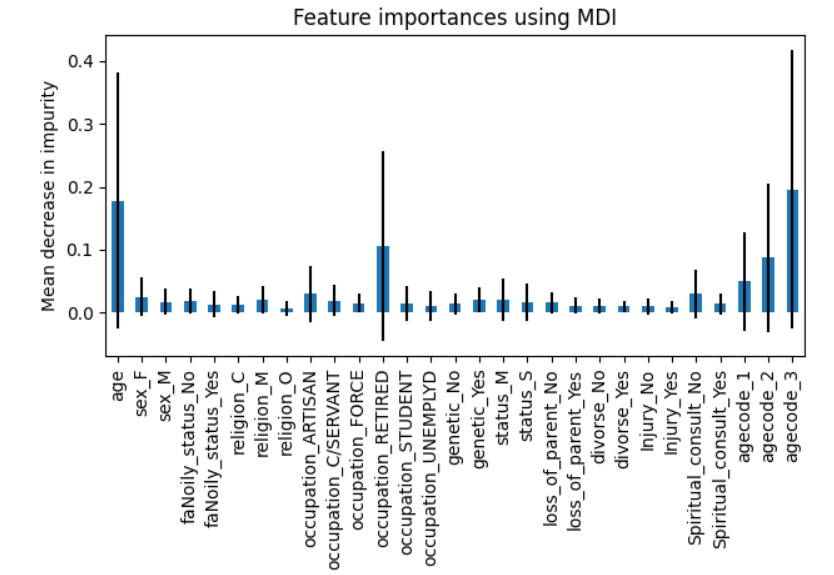

### MLP (Dementia):

- **Accuracy:** 0.8333

Feature Importance From Random Forest:

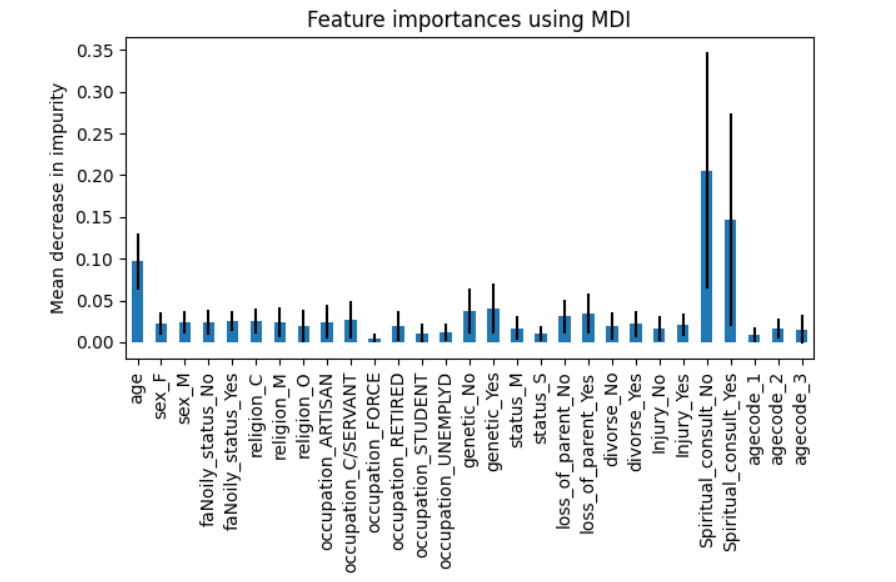

### MLP (ADHD):

- **Accuracy:** 0.7435

Feature Importance From Random Forest:

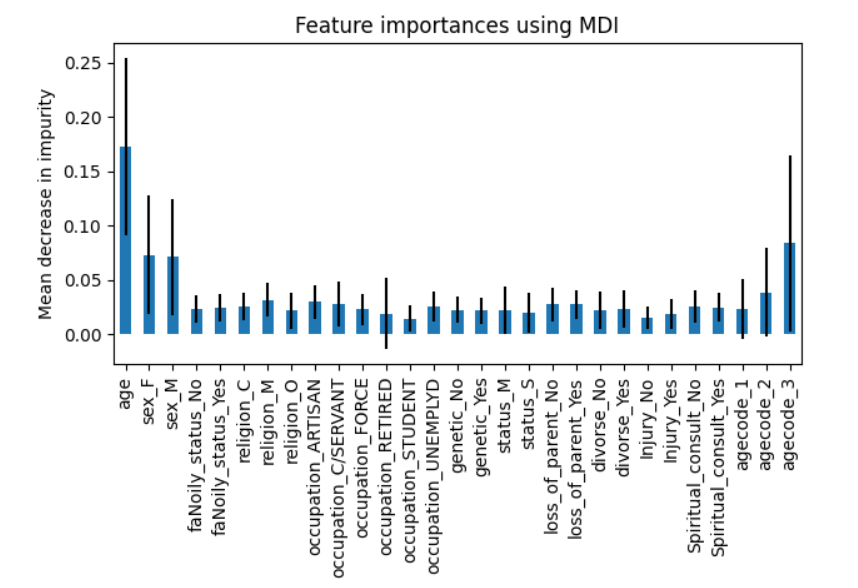

### MLP (Bipolar):

- **Accuracy:** 0.7051

Feature Importance From Random Forest:

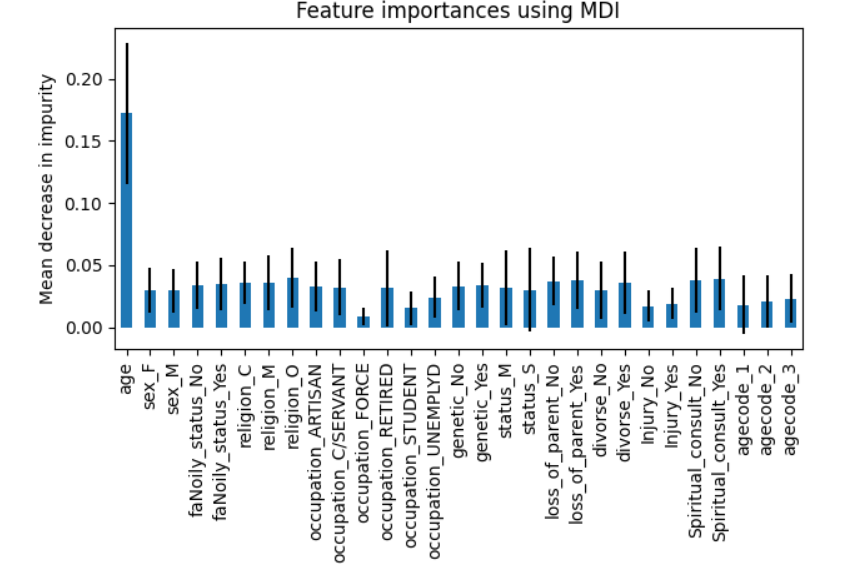


## Target Variable Correlation

Bipolar and Insomnia pairwise correlation is .98, which is a very strong correlation and confirms the papers conclusion of the fact as well.

### Overall Analysis:

    The SVM model performs the best on the Imbalanced Dataset and the Random Forest model performs the best on Balanced Data set. As far as our Hypthesises go We have succeeded on three of the four. 
    The failed hypothesis was that the MLP would perform the best on the imbalanced dataset; however, in our trials the SVM was actually the single best model on the imbalanced dataset.
    Furthermore, the Random Forest performed exceptionally well on the Balanced Dataset and proved to be the champion as can seen by the graphs above.
    In addition, our findings supported that age is one of the largest predictors for almost every target variable. The only target variable that it wasn't as strong in is Dementia yet it was still a strong predictor
    Lastly, we were easily able to determine that the correlation between Bipolar and Insomnia was very strongly correlated
    
    Ultimately, our analysis tried to copy all parts of the paper and confirmed three of the four hypothesises we made when setting out to recreate the paper. After the conclusion of recreation we have determined some pitfalls and cons of this paper that will be presented in the next section.


# Discussion

The results obtained from the multi-label classification of psychotic disorder diseases using deep learning and machine learning models provide valuable insights into the performance and challenges associated with this task.

## Is The Paper Reproducible:

Yes, the paper is reproducible, at least for the most part. The data is limited and not evenly ditributed so sampling can greatly change the performance of the models. Furthermore, we were able to obtain very similar conclusions following the process outlined in the paper. We did not get the MLP to be the best model in the imbalanced scenario like the paper did, but we did achieve a reasonable accuracy that shows that the MLP being very good at the task is plausible. 
  
## What was Easy and What was Hard:

The paper was hard to reproduce in the sense that a lot of the required steps were glossed over or occured out of order. The way that SMOTE was performed was detailed in a different process to the normal data gathering. Moreover, the paper was hard to reproduce because many different metrics were used, but the paper did not tell you how the metrics were quantified. The paper mentions using a single prediction model and a multi classification model with 5 outputs, yet the paper produces a confusion matrix using s MLP that has a different output size and data requirement than previous stated in the paper. 

The paper was very easy to reproduce as it used basic models and classic metrics to determine if the models were successful.
  

## How to Improve Reproducibility:

All in all the organization and excessive survey information lead to an unfocused paper. If the detailed steps were outlined in linear process and the metrics and models weren't cloud with a survey of the field the reproducibility of the paper would become immensely easier.

## Conclusion:

The paper is reproducible. However, the premise of the paper needs work to become usable in the field. The dataset is very limited and does not include any person that would be in a control group. Thus, most of the results are likely moot. To actually determine the ability of deep learning models to be able to predict psychotic disorders requires a better designed experiment on group that also includes controls. This paper, however does provide some insight on how some psychotic disorders may be predictors for other psychotic disorders and that is promising. All in all, the paper is reproducible, but does not seem to provide much to the field.


# References

1.  Elujide, Israel et al, Application of deep and machine learning techniques for multi-label classification performance on psychotic disorder diseases, Informatics in Medicine Unlocked, Volume 23, 2021, https://www.sciencedirect.com/science/article/pii/S2352914821000356

